In [3]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#watching dataset
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#exploring data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#analysing some features
cdf = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
5,6,3.5,230,10.0
6,6,3.5,232,10.1
7,6,3.7,255,11.1
8,6,3.7,267,11.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBB3BAFC88>,
      dtype=object)

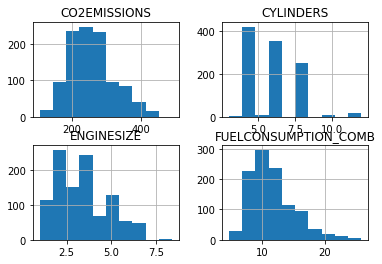

In [7]:
#visualising some features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'ENGINESIZE')

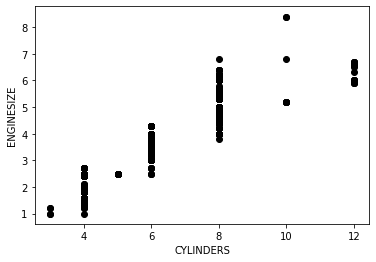

In [8]:
plt.scatter(viz.CYLINDERS,viz.ENGINESIZE,color='black')
plt.xlabel('CYLINDERS')
plt.ylabel('ENGINESIZE')

In [9]:
#SEPARATING TRAIN TEST DATA
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]
print(train)

      CYLINDERS  ENGINESIZE  CO2EMISSIONS  FUELCONSUMPTION_COMB
0             4         2.0           196                   8.5
1             4         2.4           221                   9.6
2             4         1.5           136                   5.9
3             6         3.5           255                  11.1
4             6         3.5           244                  10.6
...         ...         ...           ...                   ...
1060          6         3.0           264                  11.5
1061          6         3.2           258                  11.2
1062          6         3.0           271                  11.8
1064          6         3.0           271                  11.8
1066          6         3.2           294                  12.8

[856 rows x 4 columns]


<function matplotlib.pyplot.show(*args, **kw)>

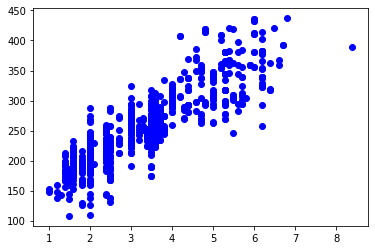

In [10]:
#visualize
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'blue')
plt.show

In [11]:
#modelling 
from sklearn import linear_model
regressor = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit(train_x,train_y)

#knowing parameters
print('Coeffeficient',regressor.coef_)
print('Intercept',regressor.intercept_)

Coeffeficient [[39.61415945]]
Intercept [123.84131244]


Text(0, 0.5, 'CO2EMMISION')

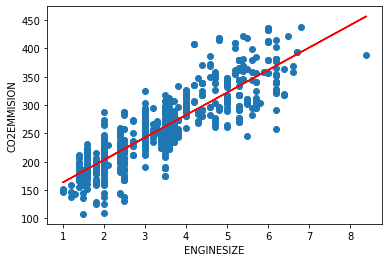

In [12]:
#visualizing line(predicted) with data
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(train_x,regressor.coef_[0][0]*train_x+regressor.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMMISION')

In [16]:
#testing 
#print(test)
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_pred = regressor.predict(test_x)

In [23]:
#evaluating
from sklearn.metrics import r2_score
print('Mean Absoulute Error = %.3f' %np.mean(np.absolute(test_y_pred-test_y)))
print('RMS = %.2f' %np.mean((test_y_pred-test_y)**2))
print('R square = %.2f' %r2_score(test_y_pred,test_y))

Mean Absoulute Error = 21.647
RMS = 838.81
R square = 0.76
